In [7]:
import tensorflow as tf

x = tf.Variable(3.0)
print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [11]:
import tensorflow as tf

x = tf.Variable(3.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [12]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [20]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [28]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10.0, 8.0]


In [34]:
x = tf.linspace(-5, 5, 100)
x = tf.cast(x, tf.float32)
print(x)
print(x.dtype)


tf.Tensor(
[-5.         -4.8989897  -4.79798    -4.6969695  -4.5959597  -4.4949493
 -4.3939395  -4.292929   -4.1919193  -4.090909   -3.989899   -3.8888888
 -3.7878788  -3.6868687  -3.5858586  -3.4848485  -3.3838384  -3.2828283
 -3.1818182  -3.0808082  -2.979798   -2.878788   -2.7777777  -2.6767676
 -2.5757575  -2.4747474  -2.3737373  -2.2727273  -2.1717172  -2.070707
 -1.969697   -1.8686869  -1.7676767  -1.6666666  -1.5656565  -1.4646465
 -1.3636364  -1.2626263  -1.1616162  -1.060606   -0.959596   -0.85858583
 -0.75757575 -0.65656567 -0.5555556  -0.45454547 -0.35353535 -0.25252524
 -0.15151516 -0.05050505  0.05050505  0.15151516  0.25252524  0.35353535
  0.45454547  0.5555556   0.65656567  0.75757575  0.85858583  0.959596
  1.060606    1.1616162   1.2626263   1.3636364   1.4646465   1.5656565
  1.6666666   1.7676767   1.8686869   1.969697    2.070707    2.1717172
  2.2727273   2.3737373   2.4747474   2.5757575   2.6767676   2.7777777
  2.878788    2.979798    3.0808082   3.1818182   3.

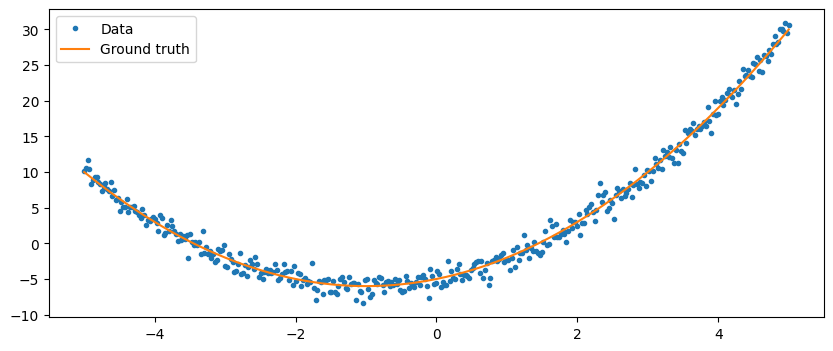

In [30]:
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf

matplotlib.rcParams['figure.figsize'] = [10, 4]
x = tf.linspace(-5, 5, 400)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y= f(x)+tf.random.normal(shape=[400])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();


In [40]:
## Summary - this part of the code define the model- in our case it is the quadratic equation. first it creates the random 3 numbers
#which are required for the quadratic equations. 1 is the quadratic weight, linear weight and bias. Next assign the varibales to the
# equation
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [41]:
quad_model= Model()

In [42]:
##
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

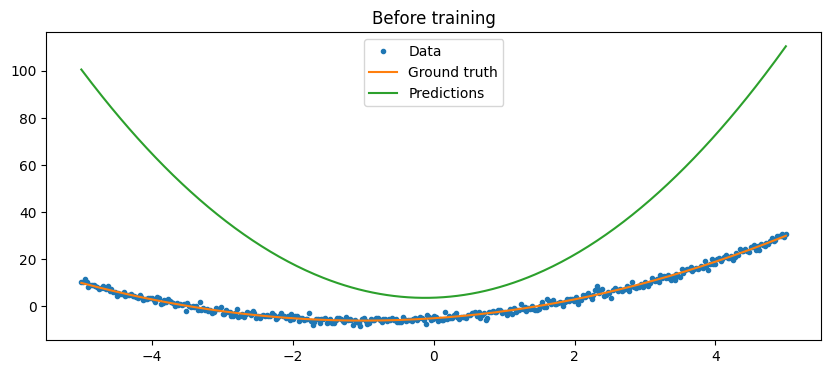

In [43]:
plot_preds(x, y, f, quad_model, 'Before training')

In [44]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))